# ÌÉúÏñë Ïù¥Î≤§Ìä∏ ÌÉêÏßÄ

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
import json
import os
import shutil

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import yaml
from PIL import Image
from tqdm import tqdm

DATASET_ROOT = "/mnt/elice/dataset"  # Îç∞Ïù¥ÌÑ∞ ÏÖãÏùò Î£®Ìä∏ ÎîîÎ†âÌÜ†Î¶¨
LABELS_DIR = "labels"
IMAGE_DIR = "images"
TRAIN_DIR = "train"
TEST_DIR = "test"
# DATASET_ROOT/train/labels: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® ÌååÏùºÏù¥ ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨
# DATASET_ROOT/train/images: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨
# DATASET_ROOT/test/labels: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® ÌååÏùºÏù¥ ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨
# DATASET_ROOT/test/images: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨

### ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [3]:
train_data = []

for image in tqdm(os.listdir(os.path.join(DATASET_ROOT, TRAIN_DIR, IMAGE_DIR))):
    image_id = image.split(".")[0]
    image_path = os.path.join(DATASET_ROOT, TRAIN_DIR, IMAGE_DIR, image)
    label_path = os.path.join(DATASET_ROOT, TRAIN_DIR, LABELS_DIR, image_id + ".txt")
    labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                class_id = int(line.split()[0])
                x = float(line.split()[1])
                y = float(line.split()[2])
                w = float(line.split()[3])
                h = float(line.split()[4])
                labels.append({"class_id": class_id, "x": x, "y": y, "w": w, "h": h})

    train_data.append({"id": image_id, "image_path": image_path, "label_path": label_path, "labels": labels})

df_train = pd.DataFrame(train_data)
df_train.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14867/14867 [00:22<00:00, 666.28it/s] 


id  \
0  081248653ac94bd0bc3558d801fbe03c   
1  7925f228ca6147b69f9eee6eb4575b56   
2  86cde8e0b0074f1d9210af8a2740c156   
3  1c7ca27850874e88b9fc942c3938202b   
4  fd660572631c492d9c4937a4c68c3414   

                                          image_path  \
0  /mnt/elice/dataset/train/images/081248653ac94b...   
1  /mnt/elice/dataset/train/images/7925f228ca6147...   
2  /mnt/elice/dataset/train/images/86cde8e0b0074f...   
3  /mnt/elice/dataset/train/images/1c7ca27850874e...   
4  /mnt/elice/dataset/train/images/fd660572631c49...   

                                          label_path  \
0  /mnt/elice/dataset/train/labels/081248653ac94b...   
1  /mnt/elice/dataset/train/labels/7925f228ca6147...   
2  /mnt/elice/dataset/train/labels/86cde8e0b0074f...   
3  /mnt/elice/dataset/train/labels/1c7ca27850874e...   
4  /mnt/elice/dataset/train/labels/fd660572631c49...   

                                              labels  
0  [{'class_id': 0, 'x': 0.3247527480125427, 'y':...  
1  [{'class_id': 0, 'x': 0.5499619841575623, 'y':...  
2  [{'class_id': 0, 'x': 0.749954879283905, 'y': ...  
3                                                 []  
4  [{'class_id': 0, 'x': 0.6441617608070374, 'y':...

### ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [4]:
test_data = []

for image in tqdm(os.listdir(os.path.join(DATASET_ROOT, TEST_DIR, IMAGE_DIR))):
    image_id = image.split(".")[0]
    image_path = os.path.join(DATASET_ROOT, TEST_DIR, IMAGE_DIR, image)

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî ÎùºÎ≤® ÌååÏùºÏù¥ ÏóÜÏäµÎãàÎã§.
    test_data.append({"id": image_id, "image_path": image_path, "label_path": "", "labels": []})

df_test = pd.DataFrame(test_data)
df_test.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6369/6369 [00:00<00:00, 158717.13it/s]


id  \
0  8abb1e02042142928d5280eb2137d538   
1  e2019257735b4230b8669e8372b9b339   
2  2e31937421354646854d599dccc2c80e   
3  29da3a3a93ec4c71b5415cfaac520831   
4  4d02b3570c414445b34516800e5eef75   

                                          image_path label_path labels  
0  /mnt/elice/dataset/test/images/8abb1e020421429...                []  
1  /mnt/elice/dataset/test/images/e2019257735b423...                []  
2  /mnt/elice/dataset/test/images/2e3193742135464...                []  
3  /mnt/elice/dataset/test/images/29da3a3a93ec4c7...                []  
4  /mnt/elice/dataset/test/images/4d02b3570c41444...                []

## ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ÌïòÍ∏∞

### ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ

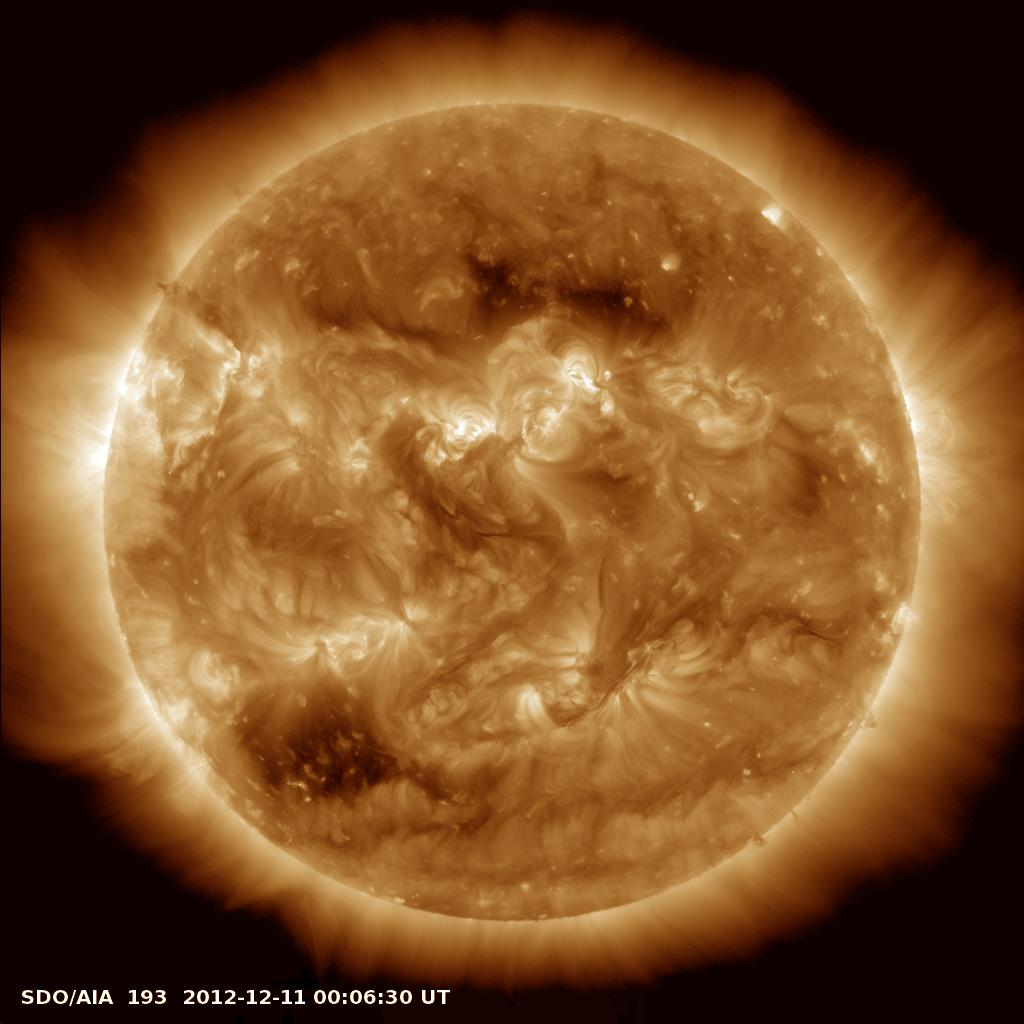

In [5]:
sample = df_train.iloc[0]

# Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
image_sample = Image.open(sample["image_path"])
image_sample

### ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÏùò ÎùºÎ≤®

ÎùºÎ≤®ÏùÄ YOLO ÌòïÏãùÏúºÎ°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

YOLO ÌòïÏãù
`<object-class> <x> <y> <width> <height>`
- object-class: Î¨ºÏ≤¥Ïùò ÌÅ¥ÎûòÏä§
- x, y: Î∞îÏö¥Îî© Î∞ïÏä§Ïùò Ï§ëÏã¨Ïùò ÏÉÅÎåÄ Ï¢åÌëú(0~1 ÏÇ¨Ïù¥ Í∞í)
- width, height: Î∞îÏö¥Îî© Î∞ïÏä§Ïùò ÎÑàÎπÑÏôÄ ÎÜíÏù¥(0~1 ÏÇ¨Ïù¥ Í∞í)

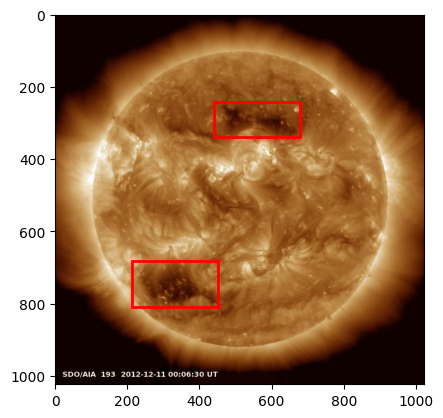

In [6]:
sample = df_train.iloc[0]
fig, ax = plt.subplots()

img = Image.open(sample["image_path"])

# Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
ax.imshow(img)

# Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
for label in sample["labels"]:
    # Ï¢åÌëú Î≥ÄÌôò (x, y, w, h Í∞íÏùÄ ÏÉÅÎåÄÏ†ÅÏù∏ Í∞í)
    c_x = label["x"] * img.width
    c_y = label["y"] * img.height
    w = label["w"] * img.width
    h = label["h"] * img.height

    left_top_x = c_x - w / 2
    left_top_y = c_y - h / 2

    rect = patches.Rectangle((left_top_x, left_top_y), w, h, linewidth=2, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

fig.show()

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [7]:
df_train_set = df_train.sample(frac=0.8, random_state=42)
df_valid_set = df_train.drop(df_train_set.index)

df_train_set.to_csv("train_set.csv", index=False)
df_valid_set.to_csv("valid_set.csv", index=False)

new_train_path = os.path.abspath("train")
new_valid_path = os.path.abspath("valid")
new_test_path = os.path.abspath("test")

os.makedirs(new_train_path, exist_ok=True)
os.makedirs(os.path.join(new_train_path, IMAGE_DIR), exist_ok=True)
os.makedirs(os.path.join(new_train_path, LABELS_DIR), exist_ok=True)
os.makedirs(new_valid_path, exist_ok=True)
os.makedirs(os.path.join(new_valid_path, IMAGE_DIR), exist_ok=True)
os.makedirs(os.path.join(new_valid_path, LABELS_DIR), exist_ok=True)
os.makedirs(new_test_path, exist_ok=True)
os.makedirs(os.path.join(new_test_path, IMAGE_DIR), exist_ok=True)

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≥µÏÇ¨

Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Î≥ÄÍ≤ΩÌïòÍ≥† Í∞ÅÍ∞Å Ìè¥ÎçîÏóê Î≥µÏÇ¨Ìï©ÎãàÎã§.

YOLO Î™®Îç∏ÏùÄ ÏÉÅÎåÄ Ï¢åÌëúÎ•º ÏÇ¨Ïö©ÌïòÎØÄÎ°ú Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Í∞Ä Î≥ÄÍ≤ΩÎêòÏñ¥ÎèÑ ÏÉÅÎåÄ Ï¢åÌëúÎäî Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏÇ¨Ïö©ÌïòÎ†§Îäî Î™®Îç∏Ïù¥ Ï†àÎåÄ Ï¢åÌëúÎ•º ÏÇ¨Ïö©ÌïúÎã§Î©¥ Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Î≥ÄÍ≤ΩÌï† Îïå ÌÅ¨Í∏∞Ïóê ÎßûÍ≤å Ï¢åÌëúÎ•º Î≥ÄÍ≤ΩÌï¥Ïïº Ìï©ÎãàÎã§.

In [8]:
IMAGE_SIZE = 512  # ÏõêÎûò Ìï¥ÏÉÅÎèÑÎäî 1024 x 1024

for i, row in tqdm(df_train_set.iterrows(), total=len(df_train_set)):
    image = Image.open(row["image_path"])
    image.resize((IMAGE_SIZE, IMAGE_SIZE)).save(f"{new_train_path}/{IMAGE_DIR}/{row['id']}.jpg")
    shutil.copy(row["label_path"], f"{new_train_path}/{LABELS_DIR}/{row['id']}.txt")
for i, row in tqdm(df_valid_set.iterrows(), total=len(df_valid_set)):
    image = Image.open(row["image_path"])
    image.resize((IMAGE_SIZE, IMAGE_SIZE)).save(f"{new_valid_path}/{IMAGE_DIR}/{row['id']}.jpg")
    shutil.copy(row["label_path"], f"{new_valid_path}/{LABELS_DIR}/{row['id']}.txt")
for i, row in tqdm(df_test.iterrows(), total=len(df_test)):
    image = Image.open(row["image_path"])
    image.resize((IMAGE_SIZE, IMAGE_SIZE)).save(f"{new_test_path}/{IMAGE_DIR}/{row['id']}.jpg")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6369/6369 [02:08<00:00, 49.66it/s]


## Î™®Îç∏ ÌïôÏäµ

### Î™®Îç∏ Ï§ÄÎπÑ

Ïô∏Î∂Ä Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ΩÏö∞ ÏïÑÎûòÏ≤òÎüº Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏûàÏäµÎãàÎã§.

- Îã§Ïö¥Î°úÎìú ÌïòÎäî ÏΩîÎìúÎ•º Î™ÖÏãú
- ÌïÑÏöîÌïú Ï¢ÖÏÜçÏÑ±ÏùÑ ÏÑ§ÏπòÌïòÎäî ÏΩîÎìúÎ•º Î™ÖÏãú

In [9]:
# YOLOv5 ÌÅ¥Î°† Î∞è ÏÑ§Ïπò 
!git clone https://github.com/ultralytics/yolov5.git 
!pip install --quiet -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16858, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 16858 (delta 19), reused 35 (delta 6), pack-reused 16805 (from 1)
Receiving objects: 100% (16858/16858), 15.54 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (11548/11548), done.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Î™®Îç∏ ÌïôÏäµ

In [10]:
dataset = {
    "path": os.path.abspath("."),
    "train": "train",
    "val": "valid",
    "nc": 3,
    "names": ["coronal_hole", "sunspot", "prominence"],
}

YAML_PATH = os.path.abspath("sun.yaml")
RESULT_PATH = os.path.abspath("result")
os.makedirs(RESULT_PATH, exist_ok=True)
with open(YAML_PATH, "w") as f:
    yaml.dump(dataset, f)

In [11]:
# !PYTHONWARNINGS="ignore::FutureWarning" python yolov5/train.py --img 256 --batch 128 --epoch 3 --data {YAML_PATH} --cfg yolov5s.yaml --exist-ok --name sun --project {RESULT_PATH}
!PYTHONWARNINGS="ignore::FutureWarning" python yolov5/train.py --img 512 --batch 128 --epoch 250 --data {YAML_PATH} --weights '' --cfg yolov5l.yaml --exist-ok --name sun --project {RESULT_PATH} --device 0

train: weights=, cfg=yolov5l.yaml, data=/home/elicer/sun.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=128, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/home/elicer/result, name=sun, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ‚úÖ
YOLOv5 üöÄ v7.0-356-g2070b303 Python-3.10.13 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, 

## Î™®Îç∏ ÌèâÍ∞Ä

### Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

In [12]:
!python yolov5/detect.py --img 512 --source {os.path.join(new_valid_path, IMAGE_DIR)} --weights {RESULT_PATH}/sun/weights/best.pt --conf 0.5 --save-txt --save-conf --exist-ok --project {RESULT_PATH}/valid  --device 0

detect: weights=['/home/elicer/result/sun/weights/best.pt'], source=/home/elicer/valid/images, data=yolov5/data/coco128.yaml, imgsz=[512, 512], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/home/elicer/result/valid, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-356-g2070b303 Python-3.10.13 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/2973 /home/elicer/valid/images/0021770e0bd943de9b981964ee82114f.jpg: 512x512 3 coronal_holes, 8.7ms
image 2/2973 /home/elicer/valid/images/002cdcade83b4b92ab541c34c87ba90d.jpg: 512x512 4 sunspots, 8.7ms
image 3/2973 /home/elicer/valid/images/0056065c2569453f8ac66508e1

### ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî

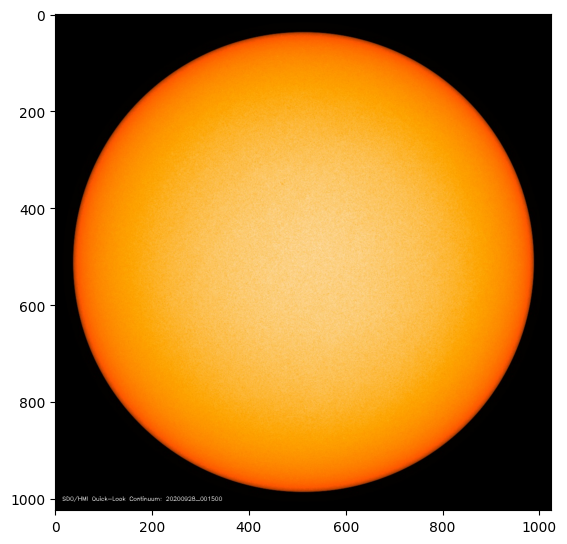

In [13]:
sample = df_valid_set.iloc[3]
fig, ax = plt.subplots()

img = Image.open(sample["image_path"])
ax.imshow(img)

# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
predict = os.path.join(RESULT_PATH, "valid", "exp", "labels", sample["id"] + ".txt")
if os.path.exists(predict):
    with open(predict, "r") as f:
        for line in f.readlines():
            class_id, c_x, c_y, w, h, conf = map(float, line.split())
            c_x *= img.width
            c_y *= img.height
            w *= img.width
            h *= img.height

            left_top_x = c_x - w / 2
            left_top_y = c_y - h / 2

            rect = patches.Rectangle(
                (left_top_x, left_top_y), w, h, linewidth=1, edgecolor="r", facecolor="none"
            )
            ax.add_patch(rect)

# Ï†ïÎãµ ÏãúÍ∞ÅÌôî
with open(sample["label_path"], "r") as f:
    for line in f.readlines():
        class_id, c_x, c_y, w, h = map(float, line.split())
        c_x *= img.width
        c_y *= img.height
        w *= img.width
        h *= img.height

        left_top_x = c_x - w / 2
        left_top_y = c_y - h / 2

        rect = patches.Rectangle((left_top_x, left_top_y), w, h, linewidth=1, edgecolor="w", facecolor="none")
        ax.add_patch(rect)
fig.set_figheight(10)
fig.show()

## Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±

### ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

In [14]:
!python yolov5/detect.py --img 512 --source {os.path.join(new_test_path, IMAGE_DIR)} --weights {RESULT_PATH}/sun/weights/best.pt --conf 0.5 --save-txt --save-conf --exist-ok --project {RESULT_PATH}/test

detect: weights=['/home/elicer/result/sun/weights/best.pt'], source=/home/elicer/test/images, data=yolov5/data/coco128.yaml, imgsz=[512, 512], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/home/elicer/result/test, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-356-g2070b303 Python-3.10.13 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46119048 parameters, 0 gradients, 107.7 GFLOPs
image 1/6369 /home/elicer/test/images/001f5cc5f47541518b712d6b0a6d18cc.jpg: 512x512 5 sunspots, 8.9ms
image 2/6369 /home/elicer/test/images/002138bcbd4343b6a6739c6f21f163d8.jpg: 512x512 2 coronal_holes, 9.5ms
image 3/6369 /home/elicer/test/images/002bc502b8254f939d581c091df31101

### Î∞îÏö¥Îìú Î∞ïÏä§ ÏùΩÏñ¥Ïò§Í∏∞

In [15]:
for i, row in tqdm(df_test.iterrows(), total=len(df_test)):
    label_path = os.path.join(RESULT_PATH, "test", "exp", "labels", row["id"] + ".txt")

    labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            class_id, c_x, c_y, w, h, conf = map(float, line.split())
            labels.append({"class_id": int(class_id), "conf": conf, "x": c_x, "y": c_y, "w": w, "h": h})

    df_test.at[i, "labels"] = labels
df_test

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6369/6369 [00:00<00:00, 6861.93it/s]


id  \
0     8abb1e02042142928d5280eb2137d538   
1     e2019257735b4230b8669e8372b9b339   
2     2e31937421354646854d599dccc2c80e   
3     29da3a3a93ec4c71b5415cfaac520831   
4     4d02b3570c414445b34516800e5eef75   
...                                ...   
6364  7a78ae524a5046889713af57538adbee   
6365  c45fea81e7db468496d57044fa4f3e5a   
6366  2715986383dc466ca338bd7167ce1fd6   
6367  e94fad68d94348168d8cf3482e49f7b3   
6368  b5c5c578e7d64772968914b53637227e   

                                             image_path label_path  \
0     /mnt/elice/dataset/test/images/8abb1e020421429...              
1     /mnt/elice/dataset/test/images/e2019257735b423...              
2     /mnt/elice/dataset/test/images/2e3193742135464...              
3     /mnt/elice/dataset/test/images/29da3a3a93ec4c7...              
4     /mnt/elice/dataset/test/images/4d02b3570c41444...              
...                                                 ...        ...   
6364  /mnt/elice/dataset/test/images/7a78ae524a50468...              
6365  /mnt/elice/dataset/test/images/c45fea81e7db468...              
6366  /mnt/elice/dataset/test/images/2715986383dc466...              
6367  /mnt/elice/dataset/test/images/e94fad68d943481...              
6368  /mnt/elice/dataset/test/images/b5c5c578e7d6477...              

                                                 labels  
0     [{'class_id': 1, 'conf': 0.636653, 'x': 0.6181...  
1                                                    []  
2     [{'class_id': 2, 'conf': 0.540048, 'x': 0.0986...  
3     [{'class_id': 1, 'conf': 0.752627, 'x': 0.5429...  
4     [{'class_id': 0, 'conf': 0.905289, 'x': 0.4804...  
...                                                 ...  
6364  [{'class_id': 2, 'conf': 0.53109, 'x': 0.18457...  
6365  [{'class_id': 2, 'conf': 0.879087, 'x': 0.8300...  
6366  [{'class_id': 1, 'conf': 0.84758, 'x': 0.07812...  
6367  [{'class_id': 1, 'conf': 0.709888, 'x': 0.2539...  
6368  [{'class_id': 1, 'conf': 0.611331, 'x': 0.0712...  

[6369 rows x 4 columns]

### ÏÉùÏÑ±ÎêòÎäî CSV ÌååÏùºÏùò ÌòïÏãù

CSV ÌååÏùºÏùÄ Í∞Å Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÎ©∞, Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïó¥(column)Î°ú Íµ¨ÏÑ±Îê©ÎãàÎã§: 

| id        | labels                             | 
|-----------|------------------------------------| 
| image_id  | [{"class_id": ..., "x": ..., "y": ..., "w": ..., "h": ...}, ...] | 

Í∞Å Ìñâ(row)ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÎÇ¥Ïö©ÏùÑ Ìè¨Ìï®Ìï©ÎãàÎã§: 
- id: Ïù¥ÎØ∏ÏßÄÏùò Í≥†Ïú† ÏãùÎ≥ÑÏûê (image_id) 
- labels: Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú ÎùºÎ≤® Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÎäî Î¶¨Ïä§Ìä∏ 
  - Í∞Å ÎùºÎ≤®ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï†ïÎ≥¥Î•º Ìè¨Ìï®Ìï©ÎãàÎã§: 
    - class_id: Í∞ùÏ≤¥Ïùò ÌÅ¥ÎûòÏä§ ID 
    - x: Í∞ùÏ≤¥Ïùò x Ï¢åÌëú (YOLO ÌòïÏãù) 
    - y: Í∞ùÏ≤¥Ïùò y Ï¢åÌëú (YOLO ÌòïÏãù) 
    - w: Í∞ùÏ≤¥Ïùò ÎÑàÎπÑ (YOLO ÌòïÏãù) 
    - h: Í∞ùÏ≤¥Ïùò ÎÜíÏù¥ (YOLO ÌòïÏãù) 

ÏòàÏãú: 
| id         | labels                                                       | 
|------------|--------------------------------------------------------------| 
| image_001  | [{"class_id": 1, "x": 0.5, "y": 0.5, "w": 0.2, "h": 0.3}] | 
| image_002  | [{"class_id": 2, "x": 0.3, "y": 0.4, "w": 0.1, "h": 0.2}, {"class_id": 1, "x": 0.7, "y": 0.8, "w": 0.15, "h": 0.25}] | 

Ï£ºÏùò: YOLO ÌòïÏãùÏùò x, y, w, hÎäî Í∞ÅÍ∞Å Ïù¥ÎØ∏ÏßÄÏùò ÎÑàÎπÑÏôÄ ÎÜíÏù¥Ïóê ÎåÄÌïú ÎπÑÏú®Î°ú ÌëúÌòÑÎêòÎ©∞, 
      xÏôÄ yÎäî Í∞ùÏ≤¥Ïùò Ï§ëÏã¨ Ï¢åÌëúÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌïòÍ≥†, wÏôÄ hÎäî Í∞ùÏ≤¥Ïùò ÌÅ¨Í∏∞Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.

### Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±

In [16]:
submission = []

for i, row in tqdm(df_test.iterrows(), total=len(df_test)):
    image_id = row["id"]
    labels = []
    for label in row["labels"]:
        class_id = label["class_id"]
        x = label["x"]
        y = label["y"]
        w = label["w"]
        h = label["h"]

        labels.append({"class_id": class_id, "x": x, "y": y, "w": w, "h": h})
    submission.append({"id": image_id, "labels": labels})

df_submission = pd.DataFrame(submission)
df_submission.to_csv("submission.csv", index=False)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6369/6369 [00:00<00:00, 17886.52it/s]


### Ï†úÏ∂ú ÌååÏùº ÌôïÏù∏

Ï†úÏ∂úÌïú ÌååÏùºÏù¥ Ïò¨Î∞îÎ•∏ ÌòïÏãùÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

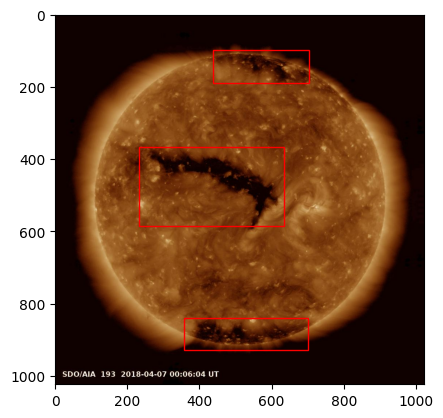

In [17]:
df_submission = pd.read_csv("submission.csv")

sample = df_submission.iloc[9]
sample_labels = eval(sample["labels"])

if len(sample_labels) == 0:
    print("ÏòàÏ∏°Í≤∞Í≥º: Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóêÏÑ† Î∞úÍ≤¨Îêú Ïù¥Î≤§Ìä∏Í∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    fig, ax = plt.subplots()
    img = Image.open(os.path.join(DATASET_ROOT, TEST_DIR, IMAGE_DIR, sample["id"] + ".jpg"))
    ax.imshow(img)

    # ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    for label in sample_labels:
        class_id = label["class_id"]
        cx = label["x"] * img.width
        cy = label["y"] * img.height
        w = label["w"] * img.width
        h = label["h"] * img.height

        left_top_x = cx - (w / 2)
        left_top_y = cy - h / 2

        rect = patches.Rectangle((left_top_x, left_top_y), w, h, linewidth=1, edgecolor="r", facecolor="none")
        ax.add_patch(rect)

## Ï†úÏ∂ú

Ïò§Î•∏Ï™Ω ÏúÑÏùò 'Ï†úÏ∂ú' Î≤ÑÌäºÏùÑ ÌÅ¥Î¶≠ÌïòÏó¨ Ï†úÏ∂úÌï©ÎãàÎã§.